<a href="https://colab.research.google.com/github/SlabberP/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**

*   Author: Pieter Slabber




## **Project Overview**

Project 1 - Part 2

Part 1:

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

Title your repository “Prediction of Product Sales”
This first project will be a sales prediction for food items sold at various stores. We want to avoid calling this something vague like "project1." Remember, this will be used to show potential employers your data science skills!
3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!

Part 2:

As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

Download the data using this link: download the data. (Note: Original data source).
Insert code below the heading "Loading Data"
Use Pandas to read the sales prediction data set into Google Colab.
Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
Insert code below the heading "Data Cleaning"
Explore the data - what do you need to do to clean this data? Clean it!
Be sure to address each of the following tasks:
1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

Here is the Data Dictionary for this dataset:


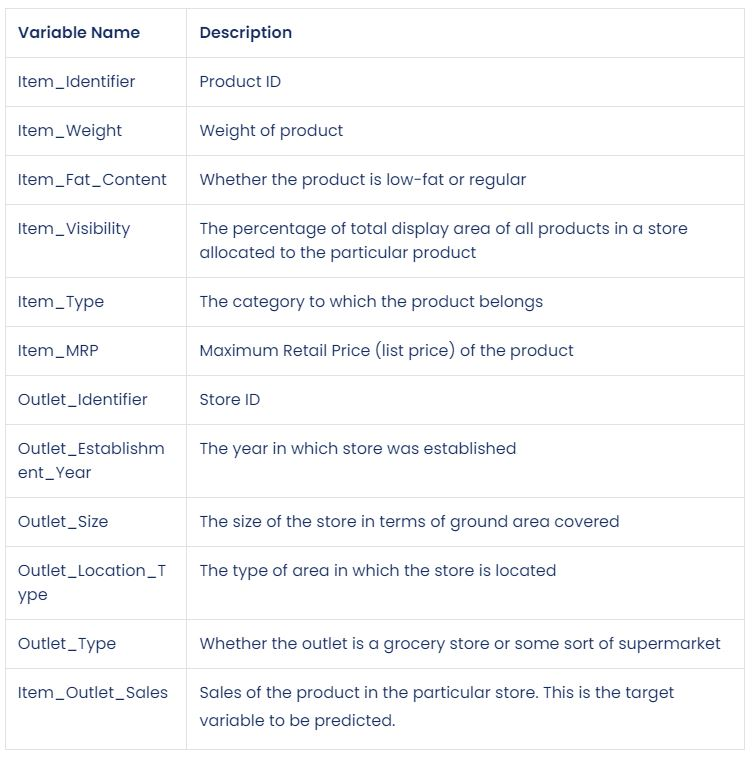

## **Imports**

In [2]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Load and Inspect Data**

In [3]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Save the filepath and load the data as "df_titanic"

fpath  ="/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

df_salesprd = pd.read_csv(fpath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Clean Data**

1) How many rows and columns?

In [4]:
# Get Dataframe statistics
df_salesprd.info()
df_salesprd.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


(8523, 12)

Answer: Rows = 8523 ,
        Columns = 12

2) What are the datatypes of each variable?

In [5]:
# Get the datatypes of each comun in the dataframe
df_salesprd.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

In [6]:
# Query for duplicates
df_salesprd.duplicated().sum()
# Remove duplicates if any exists
df_salesprd.drop_duplicates(inplace = True)

4) Identify missing values.

In [7]:
# Identify missing values or null values
df_salesprd.isna().sum()
# Identifying % of missing data
df_salesprd.isna().sum() / len(df_salesprd) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

5) Address the missing values by using a placeholder value.

In [8]:
# Replace the null with a 'Not specified' in the Item_Weight column.
df_salesprd['Item_Weight'] = df_salesprd['Item_Weight'].fillna('Not specified')

In [9]:
# Replace the null with a 'No Size' in the Outlet_Size column.
df_salesprd['Outlet_Size'] = df_salesprd['Outlet_Size'].fillna('No Size')

6) Confirm that there are no missing values after addressing them.

In [10]:
# Check again for missing or null values
df_salesprd.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
# Find inconsistencies
data_types = df_salesprd.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [12]:
# Find inconsistencies in all columns
for col in str_cols:
    print(f'- {col}:')
    print(df_salesprd[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Weight:
Not specified    1463
12.15              86
17.6               82
13.65              77
11.8               76
                 ... 
7.275               2
7.685               1
9.42                1
6.52                1
5.4                 1
Name: Item_Weight, Length: 416, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Dri

In [13]:
# Fix inconsistencies
# Column Item_Fat_Content. Replacing 'LF' with 'Low Fat'
df_salesprd['Item_Fat_Content'] = df_salesprd['Item_Fat_Content'].replace('LF', 'Low Fat')
# Column Item_Fat_Content. Replacing 'low fat' with 'Low Fat'
df_salesprd['Item_Fat_Content'] = df_salesprd['Item_Fat_Content'].replace('low fat', 'Low Fat')
# Column Item_Fat_Content. Replacing 'reg' with 'Regular'
df_salesprd['Item_Fat_Content'] = df_salesprd['Item_Fat_Content'].replace('reg', 'Regular')


In [16]:
# Find numerical columns
num_cols = df_salesprd.select_dtypes('number').columns.tolist()
num_cols

# Get the minimum value for each column
min_values = df_salesprd[num_cols].min()
# print("Minimum values:")
print(min_values)

# Get the maximum value for each column
max_values = df_salesprd[num_cols].max()
# print("\nMaximum values:")
print(max_values)

# Get the mean value for each column
mean_values = df_salesprd[num_cols].mean()
# print("\nMean values:")
print(mean_values)

Item_Visibility                 0.00
Item_MRP                       31.29
Outlet_Establishment_Year    1985.00
Item_Outlet_Sales              33.29
dtype: float64
Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
dtype: float64
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64


## **Exploratory Data Analysis**

## **Feature Inspection**